# Tabular synthetic data 
### A generation example with **Clearbox Synthetic Kit**

This notebook walks you through the tabular synthetic data generation process with **Clearbox Synthetic Kit**.

You can run this notebook on Google Colab or on your local machine.<br> 
In the second case, we highly recommend to create a dedicated virtual environment.

<div class="alert alert-secondary">
To run this notebook, make sure you change the runtime to <strong>GPU</strong><br>
<hr>
<strong>Runtime</strong> --> <strong>Change Runtime Type</strong> <br>
and set <strong>Hardware Accelerator</strong> to "<strong>GPU</strong>"
</div>

In [1]:
from clearbox_preprocessor import Preprocessor


In [2]:
# Import necessary dependencies
import os
import polars as pl
from clearbox_synthetic.utils import Dataset
from clearbox_synthetic.generation import TabularEngine
from clearbox_preprocessor import Preprocessor

## 0. Data import

In [3]:
# Load the example datasets from GitHub

file_path = "https://raw.githubusercontent.com/Clearbox-AI/clearbox-synthetic-kit/main/tests/resources/uci_adult_dataset"

train_dataset = Dataset.from_csv(
        os.path.join(file_path, "dataset.csv"),
        target_column="income",
        ml_task="classification"

)

## 1. Synhetic Data Generation

In [5]:
# Initialize the tabular synthetic data generator
engine = TabularEngine(train_dataset)

# Start the training of the tabular synthetic data generator
engine.fit(train_dataset, epochs=5, learning_rate=0.001)

⚠️ An error occurred: Unable to initialize backend 'cuda': INVALID_ARGUMENT: Mismatched PJRT plugin PJRT API version (0.55) and framework PJRT API version 0.54). (you may need to uninstall the failing plugin package, or set JAX_PLATFORMS=cpu to skip this backend.). 
Defaulting to CPU.


/home/gillus/.local/lib/python3.10/site-packages/clearbox_preprocessor/preprocessor.py:333: UserWarning: Some rare labels have been aggregated into the 'other' category. You can view the discarded labels using the 'discarded' attribute of your Preprocessor class.
If certain labels were unintentionally discarded, try adjusting the 'cat_labels_threshold' parameter, but keep in mind that rare labels are at risk of being re-identified in case of privacy attack.
  warnings.warn(f"Some rare labels have been aggregated into the 'other' category. You can view the discarded labels using the 'discarded' attribute of your Preprocessor class.\nIf certain labels were unintentionally discarded, try adjusting the 'cat_labels_threshold' parameter, but keep in mind that rare labels are at risk of being re-identified in case of privacy attack.")
Engine fitting in progress: 100%|███████████████████████████████| 5/5 [00:03<00:00,  1.49epoch/s, Train loss:=120.51354]


In [ ]:
# Generate the syntehtic dataset from the Synthesizer and save it to a .csv file
synthetic_df = engine.generate(train_dataset, n_samples=100)
synthetic_df.to_csv("synthetic_dataset.csv", index=False)

In [12]:
# Load the synethetic dataset with the Dataset class
synthetic_dataset = Dataset.from_csv(
        "synthetic_dataset.csv",
        column_types  = train_dataset.column_types,  
        target_column = train_dataset.target_column, 
        ml_task       = train_dataset.ml_task
    )

# 2. Compare the results

Compare the distributions of 

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_column_distribution(
        df1, 
        column, 
        df2=None, 
        df3=None, 
        df1_label="df_1", 
        df2_label="df_2", 
        df3_label="df_3", 
        bins=100, 
        kde=True, 
        x_min=None, 
        x_max=None, 
        normalization=False
    ):

    if normalization:
        stat = "density"
        norm=" (normalized)" 
    else:
        stat="count"
        norm=""
        
    plt.figure(figsize=(10, 5))

    # Plot distributions
    sns.histplot(df1[column], bins=bins, kde=kde, color="blue", alpha=0.4, label=df1_label, stat=stat)
    if df2 is not None:
        sns.histplot(df2[column], bins=bins, kde=kde, color="red", alpha=0.4, label=df2_label, stat=stat)
    if df3 is not None:
        sns.histplot(df3[column], bins=bins, kde=kde, color="green", alpha=0.4, label=df3_label, stat=stat)

    # Labels & Title
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.title(f"Comparison of {column} distributions"+norm)
    plt.legend()
    plt.grid(True)
    if x_min is not None and x_max is not None:
        plt.xlim([x_min,x_max])
    if column in engine.preprocessor.categorical_features:
        plt.xticks(rotation=45, ha="right")
    plt.show()


In [14]:
print("Choose a column to compare among theese:")
train_dataset.columns()

Choose a column to compare among theese:


['age',
 'work_class',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country',
 'income']

/home/gillus/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/gillus/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


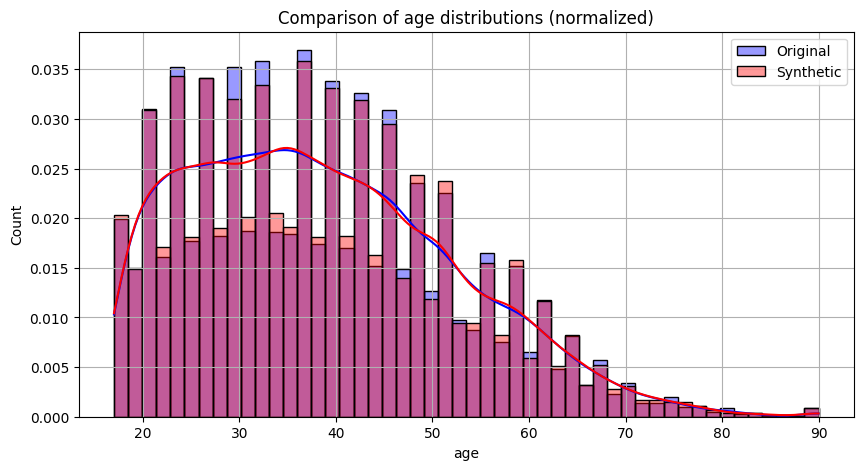

In [15]:
# Choose a column of the dataset and compare its synthetic and original distribution
col = "age"

plot_column_distribution(
    train_dataset.data, 
    col, 
    synthetic_df, 
    df1_label="Original", 
    df2_label="Synthetic",
    bins=50,
    normalization=True)